In [1]:
!nvidia-smi

Tue May  2 05:13:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    42W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-a83e8acc-4764-04db-53fc-95a53281813b)


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import SGD

from keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from math import ceil

from keras.applications import ResNet50

from keras.layers import Dense, Flatten
from keras.models import Model

from keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D, Dropout



from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from keras import models

from keras.callbacks import EarlyStopping

from keras.datasets import cifar10
from keras.utils import to_categorical

import tensorflow as tf
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, AveragePooling2D, ReLU

strategy = tf.distribute.MirroredStrategy()

from bayes_opt import BayesianOptimization

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print(type(y_train))
print(y_train.ndim)  # should output 2
print(y_train.shape) # should output (50000, 1)

print(type(y_test))
print(y_test.ndim)  # should output 2
print(y_test.shape) # should output (10000, 1)

print(X_train.ndim)  # should output 4
print(X_train.shape) # should output (50000, 32, 32, 3)

print(X_test.ndim)  # should output 4
print(X_test.shape) # should output (10000, 32, 32, 3)

X_train = X_train.astype('float64') / 255.0
X_test = X_test.astype('float64') / 255.0

170498071/170498071 [==============================] - 6s 0us/step
<class 'numpy.ndarray'>
2
(50000, 1)
<class 'numpy.ndarray'>
2
(10000, 1)
4
(50000, 32, 32, 3)
4
(10000, 32, 32, 3)


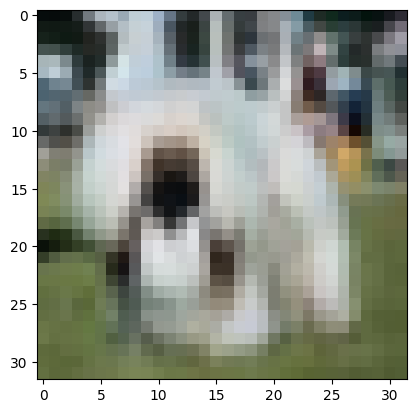

Image tensor shape: (32, 32, 3)
Image tensor data type: float64
image_tensor type <class 'numpy.ndarray'>


In [ ]:
# Load the image as a NumPy array
image_array = X_train[5036,:,:,:]

# Plot the image
plt.imshow(image_array)
plt.show()

# Reshape the image to a 4D tensor with dimensions (batch_size, height, width, channels)
# image_tensor = np.reshape(image_array, (1, 32, 32, 3))
# Normalize the pixel values to be in the range [0, 1] and convert the data type to float32
# image_tensor = image_tensor.astype('float32') / 255.0

# Check the shape and data type of the image tensor
print("Image tensor shape:", image_array.shape)
print("Image tensor data type:", image_array.dtype)
print("image_tensor type",type(image_array))

In [ ]:
np.max(image_array)

0.9215686274509803

In [ ]:
np.min(image_array)

0.011764705882352941

In [6]:
np.max(X_train[5036,:,:,:])

0.9215686274509803

In [7]:
np.min(X_train[5036,:,:,:])

0.011764705882352941

In [8]:
y_train[5036]

array([5], dtype=uint8)

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Max X_test =", np.max(X_test))
print("Min X_test =", np.min(X_test))
print("Max X_train =", np.max(X_train))
print("Min X_train =", np.min(X_train))

print("y_test dtype =", y_test.dtype)
print("y_train dtype =", y_train.dtype)
print("x_test dtype =", X_test.dtype)
print("x_train dtype =", X_train.dtype)

print(y_train.ndim)
print(y_train.shape)


Max X_test = 1.0
Min X_test = 0.0
Max X_train = 1.0
Min X_train = 0.0
y_test dtype = float32
y_train dtype = float32
x_test dtype = float64
x_train dtype = float64
2
(50000, 10)


In [10]:
y_train[5036]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
# WITH 15% SPLIT

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.15, random_state=42, shuffle=True)

print(y_train2.ndim)  # should output 2
print(y_train2.shape)

print(X_train2.ndim)  # should output 2
print(X_train2.shape)
len(X_train2)

2
(42500, 10)
4
(42500, 32, 32, 3)


42500

In [12]:
# WITH 10% SPLIT

X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

print(y_train3.ndim)  # should output 2
print(y_train3.shape)

print(X_train3.ndim)  # should output 2
print(X_train3.shape)
len(X_train3)

2
(45000, 10)
4
(45000, 32, 32, 3)


45000

In [13]:
np.max(X_train3[44999,:,:,:])

0.9921568627450981

In [14]:
np.max(X_train3[-1,:,:,:])

0.9921568627450981

In [ ]:
# a simple CNN
################################################################################
################################################################################
############################### CNN_model1 #####################################
################################################################################
################################################################################

In [ ]:
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    metrics=["accuracy"],
)

In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 14s 5ms/step - loss: 1.6461 - accuracy: 0.4133 - val_loss: 1.4201 - val_accuracy: 0.4756
Epoch 2/10
704/704 [==============================] - 4s 6ms/step - loss: 1.2433 - accuracy: 0.5636 - val_loss: 1.2521 - val_accuracy: 0.5484
Epoch 3/10
704/704 [==============================] - 3s 5ms/step - loss: 1.0571 - accuracy: 0.6311 - val_loss: 1.0457 - val_accuracy: 0.6336
Epoch 4/10
704/704 [==============================] - 3s 5ms/step - loss: 0.9302 - accuracy: 0.6785 - val_loss: 1.1987 - val_accuracy: 0.6018
Epoch 5/10
704/704 [==============================] - 4s 5ms/step - loss: 0.8406 - accuracy: 0.7086 - val_loss: 0.8572 - val_accuracy: 0.7058
Epoch 6/10
704/704 [==============================] - 4s 5ms/step - loss: 0.7622 - accuracy: 0.7366 - val_loss: 1.1497 - val_accuracy: 0.6298
Epoch 7/10
704/704 [==============================] - 4s 5ms/step - loss: 0.6991 - accuracy: 0.7586 - val_loss: 0.9676 - val_accuracy: 0.6770
Epoch

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.9557 - accuracy: 0.6855
Test accuracy: 0.6855000257492065


In [ ]:
# a simple CNN with more layers
################################################################################
################################################################################
############################### CNN_model2 #####################################
################################################################################
################################################################################

In [ ]:
CNN_model2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

CNN_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
CNN_model2.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.1)

Epoch 1/20
704/704 [==============================] - 10s 9ms/step - loss: 1.7159 - accuracy: 0.3572 - val_loss: 1.3060 - val_accuracy: 0.5160
Epoch 2/20
704/704 [==============================] - 5s 7ms/step - loss: 1.2645 - accuracy: 0.5415 - val_loss: 1.0911 - val_accuracy: 0.6212
Epoch 3/20
704/704 [==============================] - 5s 8ms/step - loss: 1.0673 - accuracy: 0.6203 - val_loss: 0.9250 - val_accuracy: 0.6688
Epoch 4/20
704/704 [==============================] - 6s 9ms/step - loss: 0.9409 - accuracy: 0.6687 - val_loss: 0.8472 - val_accuracy: 0.7040
Epoch 5/20
704/704 [==============================] - 7s 10ms/step - loss: 0.8575 - accuracy: 0.6987 - val_loss: 0.7267 - val_accuracy: 0.7484
Epoch 6/20
704/704 [==============================] - 9s 13ms/step - loss: 0.7879 - accuracy: 0.7238 - val_loss: 0.7042 - val_accuracy: 0.7534
Epoch 7/20
704/704 [==============================] - 8s 11ms/step - loss: 0.7435 - accuracy: 0.7409 - val_loss: 0.6848 - val_accuracy: 0.7672
Ep

In [ ]:
test_loss, test_acc = CNN_model2.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.6203 - accuracy: 0.8002
Test accuracy: 0.8001999855041504


In [ ]:
# CNN with data more layer, global optimizer
################################################################################
################################################################################
################################# CNN_model3 ########################################
################################################################################
################################################################################

In [ ]:
strategy = tf.distribute.MirroredStrategy()

# Define and compile your Keras model
with strategy.scope():
  CNN_model3 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



opt = SGD(learning_rate=0.001)
CNN_model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


CNN_model3_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/CNN_model3.h5'
CNN_model3_path = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/CNN_model3_weights'
checkpoint_path = os.path.join(CNN_model3_path)
checkpoint_Ped = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                                 patience=20, min_lr=0.00000000001)



callbacks_Ped = [checkpoint_Ped, reduce_lr, EarlyStopping(monitor='val_loss', patience=40, verbose=1)]

CNN_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)      

In [ ]:
history_CNN_model3= CNN_model3.fit(X_train3, y_train3, batch_size=200, epochs=500, callbacks = callbacks_Ped, validation_data=(X_val3, y_val3))


CNN_model3.save(CNN_model3_path_T)

test_loss, test_acc = CNN_model3.evaluate(X_test, y_test)
print("Test accuracy:", test_acc) # epock 215 ==== 0.592199981212616

Epoch 1/500
225/225 [==============================] - 9s 31ms/step - loss: 3.2651 - accuracy: 0.1476 - val_loss: 3.0012 - val_accuracy: 0.0972 - lr: 0.0010
Epoch 2/500
225/225 [==============================] - 6s 25ms/step - loss: 2.7856 - accuracy: 0.2108 - val_loss: 2.8374 - val_accuracy: 0.1490 - lr: 0.0010
Epoch 3/500
225/225 [==============================] - 5s 22ms/step - loss: 2.5016 - accuracy: 0.2547 - val_loss: 2.2147 - val_accuracy: 0.2412 - lr: 0.0010
Epoch 4/500
225/225 [==============================] - 5s 23ms/step - loss: 2.3334 - accuracy: 0.2770 - val_loss: 2.3297 - val_accuracy: 0.2330 - lr: 0.0010
Epoch 5/500
225/225 [==============================] - 5s 22ms/step - loss: 2.2039 - accuracy: 0.2978 - val_loss: 1.8397 - val_accuracy: 0.3404 - lr: 0.0010
Epoch 6/500
225/225 [==============================] - 5s 22ms/step - loss: 2.0858 - accuracy: 0.3181 - val_loss: 1.6711 - val_accuracy: 0.3876 - lr: 0.0010
Epoch 7/500
225/225 [==============================] - 7s 

In [ ]:
weights, biases = CNN_model3.layers[-1].get_weights()
print("Weights shape:", weights.shape)
print("Biases shape:", biases.shape)

Weights shape: (512, 10)
Biases shape: (10,)


In [ ]:
# at this stage since there is no sign of overfitting we can train for more epochs
# before 1. lowering learning rate or 2. adding more layers in case the model is
# not able to get higher accuray


opt = SGD(learning_rate=0.001)
CNN_model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


CNN_model3_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/CNN_model3.h5'
CNN_model3_path = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/CNN_model3_weights'
checkpoint_path = os.path.join(CNN_model3_path)
checkpoint_Ped = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                                 patience=20, min_lr=0.00000000001)



callbacks_Ped = [checkpoint_Ped, reduce_lr, EarlyStopping(monitor='val_loss', patience=30, verbose=1)]

In [ ]:
# Train the model for another 500 epochs and append the new history
new_history = CNN_model3.fit(X_train3, y_train3, batch_size=200, epochs=400,
                             callbacks=callbacks_Ped, validation_data=(X_val3, y_val3))




for key in new_history.history.keys():
    history_CNN_model3.history[key].extend(new_history.history[key])

# # Save the model
CNN_model3.save(CNN_model3_path_T)

# Evaluate the model
test_loss, test_acc = CNN_model3.evaluate(X_test, y_test)
print("Test accuracy:", test_acc) # Epoch 162: early stopping === 0.6765000224113464

Epoch 1/400
225/225 [==============================] - 8s 25ms/step - loss: 0.6183 - accuracy: 0.7822 - val_loss: 0.7217 - val_accuracy: 0.7570 - lr: 0.0010
Epoch 2/400
225/225 [==============================] - 5s 24ms/step - loss: 0.6177 - accuracy: 0.7833 - val_loss: 0.7114 - val_accuracy: 0.7594 - lr: 0.0010
Epoch 3/400
225/225 [==============================] - 5s 21ms/step - loss: 0.6150 - accuracy: 0.7849 - val_loss: 0.7417 - val_accuracy: 0.7532 - lr: 0.0010
Epoch 4/400
225/225 [==============================] - 5s 24ms/step - loss: 0.6141 - accuracy: 0.7846 - val_loss: 0.6965 - val_accuracy: 0.7626 - lr: 0.0010
Epoch 5/400
225/225 [==============================] - 5s 23ms/step - loss: 0.6165 - accuracy: 0.7839 - val_loss: 0.7667 - val_accuracy: 0.7364 - lr: 0.0010
Epoch 6/400
225/225 [==============================] - 5s 21ms/step - loss: 0.6139 - accuracy: 0.7842 - val_loss: 0.6935 - val_accuracy: 0.7620 - lr: 0.0010
Epoch 7/400
225/225 [==============================] - 5s 

In [ ]:
# at this stage since there is no sign of overfitting we can train for more epochs
# before 1. lowering learning rate or 2. adding more layers in case the model is
# not able to get higher accuray


opt = SGD(learning_rate=0.00001)
CNN_model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


CNN_model3_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/CNN_model3.h5'
CNN_model3_path = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/CNN_model3_weights'
checkpoint_path = os.path.join(CNN_model3_path)
checkpoint_Ped = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                                 patience=15, min_lr=0.00000000001)



callbacks_Ped = [checkpoint_Ped, reduce_lr, EarlyStopping(monitor='val_loss', patience=20, verbose=1)]

# Train the model for another 500 epochs and append the new history
new_history = CNN_model3.fit(X_train3, y_train3, batch_size=200, epochs=400,
                             callbacks=callbacks_Ped, validation_data=(X_val3, y_val3))




for key in new_history.history.keys():
    history_CNN_model3.history[key].extend(new_history.history[key])

# # Save the model
CNN_model3.save(CNN_model3_path_T)

# Evaluate the model
test_loss, test_acc = CNN_model3.evaluate(X_test, y_test)
print("Test accuracy:", test_acc) # Epoch 162: early stopping === 0.6765000224113464

Epoch 1/400
225/225 [==============================] - 7s 24ms/step - loss: 0.5023 - accuracy: 0.8233 - val_loss: 0.6487 - val_accuracy: 0.7840 - lr: 1.0000e-05
Epoch 2/400
225/225 [==============================] - 5s 22ms/step - loss: 0.5058 - accuracy: 0.8225 - val_loss: 0.6500 - val_accuracy: 0.7826 - lr: 1.0000e-05
Epoch 3/400
225/225 [==============================] - 5s 22ms/step - loss: 0.5008 - accuracy: 0.8248 - val_loss: 0.6465 - val_accuracy: 0.7830 - lr: 1.0000e-05
Epoch 4/400
225/225 [==============================] - 5s 20ms/step - loss: 0.5000 - accuracy: 0.8244 - val_loss: 0.6473 - val_accuracy: 0.7832 - lr: 1.0000e-05
Epoch 5/400
225/225 [==============================] - 5s 22ms/step - loss: 0.5018 - accuracy: 0.8243 - val_loss: 0.6480 - val_accuracy: 0.7830 - lr: 1.0000e-05
Epoch 6/400
225/225 [==============================] - 5s 22ms/step - loss: 0.5035 - accuracy: 0.8238 - val_loss: 0.6503 - val_accuracy: 0.7830 - lr: 1.0000e-05
Epoch 7/400
225/225 [=============

In [ ]:
# at this stage since there is no sign of overfitting we can train for more epochs
# before 1. lowering learning rate or 2. adding more layers in case the model is
# not able to get higher accuray

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

CNN_model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


CNN_model3_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/CNN_model3.h5'
CNN_model3_path = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/CNN_model3_weights'
checkpoint_path = os.path.join(CNN_model3_path)
checkpoint_Ped = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                                 patience=10, min_lr=0.000000001)



callbacks_Ped = [checkpoint_Ped, reduce_lr, EarlyStopping(monitor='val_loss', patience=15, verbose=1)]

# Train the model for another 500 epochs and append the new history
new_history = CNN_model3.fit(X_train3, y_train3, batch_size=200, epochs=50,
                             callbacks=callbacks_Ped, validation_data=(X_val3, y_val3))






# Evaluate the model
test_loss, test_acc = CNN_model3.evaluate(X_test, y_test)
print("Test accuracy:", test_acc) # Epoch 162: early stopping === 0.6765000224113464

Epoch 1/50
225/225 [==============================] - 16s 30ms/step - loss: 0.8969 - accuracy: 0.6906 - val_loss: 1.3916 - val_accuracy: 0.6578 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 5s 23ms/step - loss: 0.7139 - accuracy: 0.7552 - val_loss: 0.8054 - val_accuracy: 0.7370 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 5s 24ms/step - loss: 0.6167 - accuracy: 0.7897 - val_loss: 0.8719 - val_accuracy: 0.7274 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 6s 25ms/step - loss: 0.5519 - accuracy: 0.8102 - val_loss: 0.6408 - val_accuracy: 0.7910 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 5s 24ms/step - loss: 0.4983 - accuracy: 0.8304 - val_loss: 0.5564 - val_accuracy: 0.8150 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 6s 25ms/step - loss: 0.4533 - accuracy: 0.8457 - val_loss: 0.5572 - val_accuracy: 0.8134 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - 5s 24ms/s

In [ ]:
for key in new_history.history.keys():
    history_CNN_model3.history[key].extend(new_history.history[key])

# # Save the model
CNN_model3.save(CNN_model3_path_T)

In [ ]:
image = X_train[5036,:,:,:]
image = np.expand_dims(image, axis=0)
prob_vector = CNN_model3.predict(image)

print(prob_vector)

1/1 [==============================] - 0s 250ms/step
[[1.1982176e-09 1.6125456e-07 4.3310116e-08 2.3596838e-05 1.9784456e-07
  9.9997532e-01 7.4573663e-09 5.7901173e-07 1.4727061e-09 1.0523736e-08]]


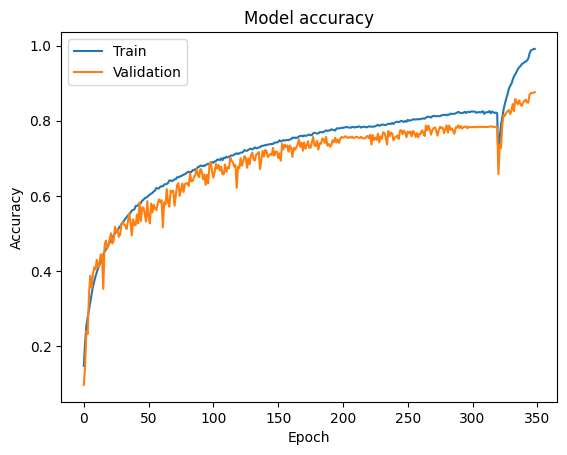

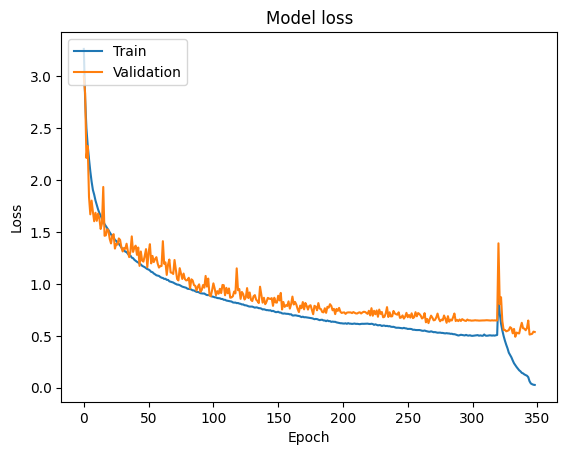

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_CNN_model3.history['accuracy'])
plt.plot(history_CNN_model3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_CNN_model3.history['loss'])
plt.plot(history_CNN_model3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Load the saved model
# CNN_model3_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/CNN_model3.h5'
# CNN_model3 = tf.keras.models.load_model(CNN_model3_path_T)

# Calculate the size of the model
model_size = os.path.getsize(CNN_model3_path_T) / (1024 * 1024)

# Calculate the top-1 and top-2 accuracies on the test data
top1_accuracy = CNN_model3.evaluate(X_test, y_test)[1]


# Define a function to calculate the top-2 accuracy
y_pred = CNN_model3.predict(X_test)

top2_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=2)
top2_acc.update_state(y_test, y_pred)
top2_accuracy = top2_acc.result().numpy()
# print('Top-5 accuracy:', top2_acc.result().numpy())



# Calculate the train and validation accuracies
train_accuracy = CNN_model3.evaluate(X_train3, y_train3)[1]
val_accuracy = CNN_model3.evaluate(X_val3, y_val3)[1]

# Count the number of trainable and non-trainable parameters in the model
num_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in CNN_model3.trainable_variables])
num_non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in CNN_model3.non_trainable_variables])
num_params = num_trainable_params + num_non_trainable_params

# Calculate the depth of the model
depth = len(CNN_model3.layers)

# Print the information in the required format
print("| CNN_model3 | {:.2f} | {:.4f} | {:.4f} | {:.4f} | {:.4f} | {} | {} |".format(
    model_size, top1_accuracy, top2_accuracy, train_accuracy, val_accuracy, num_params, depth))

157/157 [==============================] - 1s 4ms/step - loss: 0.5371 - accuracy: 0.8760
| CNN_model3 | 28.73 | 0.8741 | 0.9533 | 1.0000 | 0.8760 | 2493834 | 37 |


In [ ]:
# a simple ResNet50
################################################################################
################################################################################
################################## resnet_model1 ##################################
################################################################################
################################################################################

In [ ]:
strategy = tf.distribute.MirroredStrategy()

# Define and compile your Keras model
with strategy.scope():
  # Define the input shape
  input_shape = (32, 32, 3)
  num_classes = 10
  
  # Load the ResNet50 model
  # weights=None, include_top=True
  resnet_model_base = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False, classes=num_classes) 
  # resnet_model = ResNet50(input_shape=input_shape, weights=None, classes=10)
  for layer in resnet_model_base.layers:
  # if layer.trainable:
    layer.trainable = True
  # Add the top layers
  x = resnet_model_base.output
  x = Flatten()(x)
  predictions = Dense(num_classes, activation='softmax')(x)

  # Combine the base model and top layers
  resnet50_model1 = Model(inputs=resnet_model_base.input, outputs=predictions)
  # Compile the model
  resnet50_model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  # Print the model summary
  resnet50_model1.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                             

In [ ]:
# Train the model
history_resnet50_model = resnet50_model1.fit(X_train2, y_train2, epochs=30, batch_size=64, validation_data=(X_val2, y_val2))

Epoch 1/30
665/665 [==============================] - 93s 71ms/step - loss: 1.4402 - accuracy: 0.5529 - val_loss: 3.8492 - val_accuracy: 0.1967
Epoch 2/30
665/665 [==============================] - 37s 55ms/step - loss: 1.3353 - accuracy: 0.5864 - val_loss: 2.1260 - val_accuracy: 0.4603
Epoch 3/30
665/665 [==============================] - 39s 59ms/step - loss: 0.9772 - accuracy: 0.6797 - val_loss: 1.2379 - val_accuracy: 0.6243
Epoch 4/30
665/665 [==============================] - 41s 62ms/step - loss: 1.0040 - accuracy: 0.6798 - val_loss: 2.3613 - val_accuracy: 0.4337
Epoch 5/30
665/665 [==============================] - 38s 56ms/step - loss: 1.3863 - accuracy: 0.5632 - val_loss: 1.7001 - val_accuracy: 0.4604
Epoch 6/30
665/665 [==============================] - 40s 61ms/step - loss: 1.0088 - accuracy: 0.6689 - val_loss: 1.1074 - val_accuracy: 0.6372
Epoch 7/30
665/665 [==============================] - 36s 54ms/step - loss: 0.9555 - accuracy: 0.7030 - val_loss: 1.0343 - val_accuracy:

In [ ]:
test_loss, test_acc = resnet50_model1.evaluate(X_test, y_test)
print("Test accuracy:", test_acc) # Test accuracy: 0.6413000226020813

313/313 [==============================] - 4s 11ms/step - loss: 1.1996 - accuracy: 0.7545
Test accuracy: 0.7544999718666077


In [ ]:
# the resnet50_model1 with adding more Dense top layers and data Augmentation
################################################################################
################################################################################
############################## resnet50_model3 #################################
################################################################################
################################################################################

In [ ]:
strategy = tf.distribute.MirroredStrategy()

# Define and compile your Keras model
with strategy.scope():
    # Define the input shape
    input_shape = (32, 32, 3)
    num_classes = 10

    # Load the ResNet50 model
    # (weights='imagenet', include_top=False) OR (weights=None, include_top=True)
    resnet50_model_base3 = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False, classes=num_classes)


    # Freeze the layers in the base model
    resnet50_model_base3.trainable = True
    # Add the top layers
    x = resnet50_model_base3.output
    x = Flatten()(x)
    x = Dropout(0.2)(x)
    x = Dense(2048, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = Dropout(0.2)(x)
    x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = Dropout(0.2)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Combine the base model and top layers
    resnet50_model3 = Model(inputs=resnet50_model_base3.input, outputs=predictions)

    #  Define data augmentation pipelines
    data_gen = ImageDataGenerator(
         rotation_range=10,  # rotate images by up to 10 degrees
         width_shift_range=0.05,  # shift images horizontally by up to 5% of the width
         height_shift_range=0.05,  # shift images vertically by up to 5% of the height
         zoom_range=0.05,  # zoom in on images by up to 5%
         horizontal_flip=True,  # flip images horizontally
         # brightness_range=[0.8, 1.2],  # adjust brightness randomly between 0.8 and 1.2
         # shear_range=0.1,  # shear images by up to 10 degrees
         fill_mode='nearest'  # fill any pixel that might be lost after rotation or shift with the nearest pixel value
     )

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    resnet50_model3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



resnet50_model3_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/resnet50_model3.h5'
resnet50_model3_path = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/resnet50_model3_weights'
checkpoint_path = os.path.join(resnet50_model3_path)
checkpoint_Ped = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                                 patience=5, min_lr=0.0000001)


callbacks_Ped = [checkpoint_Ped, reduce_lr, EarlyStopping(monitor='val_loss', patience=5*2, verbose=1)]

In [ ]:
# Fit the model with data augmentation
history_resnet50_model3 = resnet50_model3.fit(data_gen.flow(X_train2, y_train2, batch_size=100),
                                               epochs=50,
                                               validation_data=(X_val2, y_val2),
                                               callbacks=callbacks_Ped)

resnet50_model3.save(resnet50_model3_path_T)

test_loss, test_acc = resnet50_model3.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)
# Epoch 43: early stopping === Test accuracy: 0.6913999915122986


Epoch 1/50
425/425 [==============================] - 101s 130ms/step - loss: 5.7305 - accuracy: 0.5749 - val_loss: 3.1286 - val_accuracy: 0.0961 - lr: 0.0010
Epoch 2/50
425/425 [==============================] - 54s 128ms/step - loss: 1.0993 - accuracy: 0.7002 - val_loss: 2.3528 - val_accuracy: 0.3619 - lr: 0.0010
Epoch 3/50
425/425 [==============================] - 54s 127ms/step - loss: 0.9812 - accuracy: 0.7334 - val_loss: 0.9997 - val_accuracy: 0.7121 - lr: 0.0010
Epoch 4/50
425/425 [==============================] - 50s 118ms/step - loss: 0.9233 - accuracy: 0.7513 - val_loss: 1.0688 - val_accuracy: 0.6996 - lr: 0.0010
Epoch 5/50
425/425 [==============================] - 50s 118ms/step - loss: 0.8635 - accuracy: 0.7679 - val_loss: 1.0540 - val_accuracy: 0.7063 - lr: 0.0010
Epoch 6/50
425/425 [==============================] - 52s 122ms/step - loss: 0.8197 - accuracy: 0.7804 - val_loss: 1.0304 - val_accuracy: 0.7187 - lr: 0.0010
Epoch 7/50
425/425 [==============================]

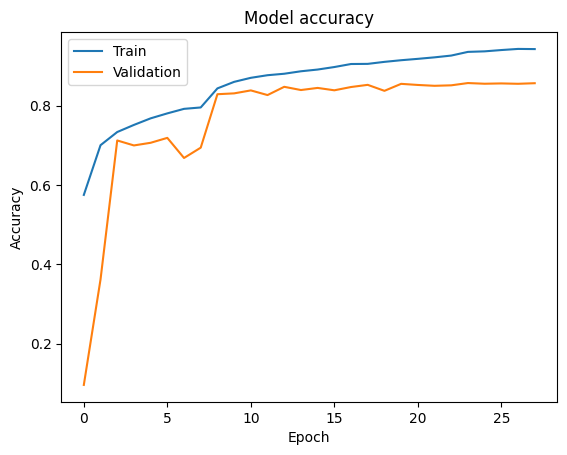

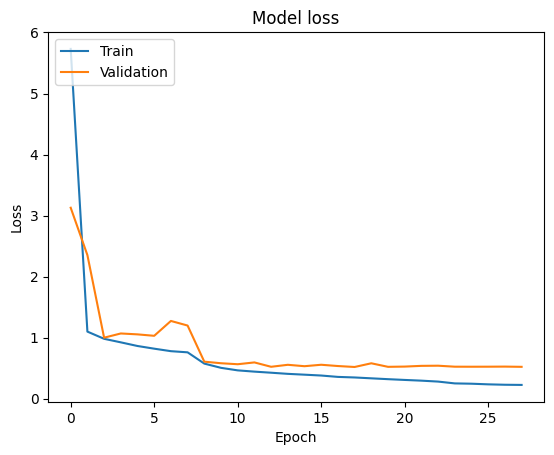

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_resnet50_model3.history['accuracy'])
plt.plot(history_resnet50_model3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_resnet50_model3.history['loss'])
plt.plot(history_resnet50_model3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

model_size = os.path.getsize(resnet50_model3_path_T) / (1024 * 1024)

# Calculate the top-1 and top-2 accuracies on the test data
top1_accuracy = resnet50_model3.evaluate(X_test, y_test)[1]


# Define a function to calculate the top-2 accuracy
y_pred = resnet50_model3.predict(X_test)

top2_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=2)
top2_acc.update_state(y_test, y_pred)
top2_accuracy = top2_acc.result().numpy()
# print('Top-5 accuracy:', top2_acc.result().numpy())



# Calculate the train and validation accuracies
train_accuracy = resnet50_model3.evaluate(X_train2, y_train2)[1]
val_accuracy = resnet50_model3.evaluate(X_val2, y_val2)[1]

# Count the number of trainable and non-trainable parameters in the model
num_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in resnet50_model3.trainable_variables])
num_non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in resnet50_model3.non_trainable_variables])
num_params = num_trainable_params + num_non_trainable_params

# Calculate the depth of the model
depth = len(resnet50_model3.layers)

# Print the information in the required format
print("| resnet50_model3 | {:.2f} | {:.4f} | {:.4f} | {:.4f} | {:.4f} | {} | {} |".format(
    model_size, top1_accuracy, top2_accuracy, train_accuracy, val_accuracy, num_params, depth))

235/235 [==============================] - 4s 16ms/step - loss: 0.5222 - accuracy: 0.8564
| resnet50_model3 | 348.54 | 0.8532 | 0.9389 | 0.9557 | 0.8564 | 30412170 | 184 |


In [ ]:
# ResNet34 this model is similar to resnet50_model2
###############################################################################
###############################################################################
############################## resnet34_model1 ################################
###############################################################################
###############################################################################

In [ ]:
input_shape = (32, 32, 3)
num_classes = 10


def conv1x1(inputs, filters, stride=1):
  conv = tf.keras.layers.Conv2D(filters=filters, kernel_size=(1, 1), strides=stride,
                                padding='same', use_bias=True)(inputs)
  BachNor = tf.keras.layers.BatchNormalization()(conv)
  RelU = tf.keras.layers.ReLU()(BachNor)
  return RelU

def conv3x3(inputs, filters, stride=1):
  conv = tf.keras.layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=stride,
                                padding='same')(inputs)
  BachNor = tf.keras.layers.BatchNormalization()(conv)
  RelU = tf.keras.layers.ReLU()(BachNor)
  return RelU


def residual_block(inputs, filters, stride=1):
  shortcut = inputs
  if stride != 1 or inputs.shape[-1] != filters:
    shortcut = conv1x1(inputs, filters, stride)
  x = conv3x3(inputs, filters, stride)
  x = conv3x3(x, filters, 1)
 
  output = tf.keras.layers.add([x, shortcut])
  output = tf.keras.layers.ReLU()(output)
  return output

def ResNet34(input_shape, num_classes):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=2,
                               padding='same', use_bias=True)(inputs)
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(4, 4),
                                  padding='same')(inputs)

    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    for filters, stride in [(64, 1), (64, 1), (64, 1), (128, 2), (128, 1), (128, 1), (128, 1), (256, 2), (256, 1), (256, 1), (256, 1), (256, 1), (256, 1), (512, 2), (512, 1), (512, 1)]:
      x = residual_block(x, filters, stride=stride)
    
    
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    resnet34_model1 = models.Model(inputs=inputs, outputs=outputs)
    return resnet34_model1



resnet34_model1 = ResNet34(input_shape=input_shape, num_classes=num_classes)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
resnet34_model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

resnet34_model1_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/resnet34_model1.h5'
resnet34_model1_path = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/resnet34_model1_weights'
checkpoint_path = os.path.join(resnet34_model1_path)
checkpoint_Ped = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                                                  patience=3, min_lr=0.00000000001)

def lr_scheduler(epoch):
    if  epoch < 10:
        return 0.01
    if  10<= epoch < 25:
        return 0.001
    if  25<= epoch < 35:
        return 0.0001
    else:
        return 0.00001

reduce_lr = LearningRateScheduler(lr_scheduler)

callbacks_Ped = [checkpoint_Ped, reduce_lr, EarlyStopping(monitor='val_loss', patience=20, verbose=1)]


resnet34_model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   3136        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 64)  256         ['conv2d_1[0][0]']               
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 32, 32, 64)   0           ['batch_normalization[0][0]']

In [ ]:
history_resnet34_model1 = resnet34_model1.fit(X_train2, y_train2, batch_size=100,
                                               epochs=50,
                                               validation_data=(X_val2, y_val2),
                                               callbacks=callbacks_Ped)

resnet34_model1.save(resnet34_model1_path_T)

test_loss, test_acc = resnet34_model1.evaluate(X_test, y_test)
print("Test accuracy:", test_acc) # Epoch 31: early stopping == Test accuracy: 0.7245000004768372

Epoch 1/50
425/425 [==============================] - 49s 38ms/step - loss: 2.3237 - accuracy: 0.2425 - val_loss: 5.6475 - val_accuracy: 0.2187 - lr: 0.0100
Epoch 2/50
425/425 [==============================] - 14s 33ms/step - loss: 1.4629 - accuracy: 0.4654 - val_loss: 1.7518 - val_accuracy: 0.4420 - lr: 0.0100
Epoch 3/50
425/425 [==============================] - 14s 33ms/step - loss: 1.1436 - accuracy: 0.5899 - val_loss: 1.2810 - val_accuracy: 0.5433 - lr: 0.0100
Epoch 4/50
425/425 [==============================] - 14s 33ms/step - loss: 0.9362 - accuracy: 0.6696 - val_loss: 1.0908 - val_accuracy: 0.6055 - lr: 0.0100
Epoch 5/50
425/425 [==============================] - 12s 29ms/step - loss: 0.7939 - accuracy: 0.7190 - val_loss: 1.4729 - val_accuracy: 0.5545 - lr: 0.0100
Epoch 6/50
425/425 [==============================] - 16s 37ms/step - loss: 0.6551 - accuracy: 0.7699 - val_loss: 1.0409 - val_accuracy: 0.6437 - lr: 0.0100
Epoch 7/50
425/425 [==============================] - 15s 

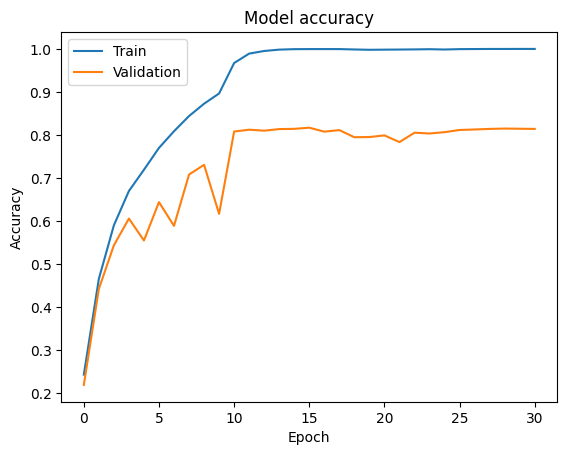

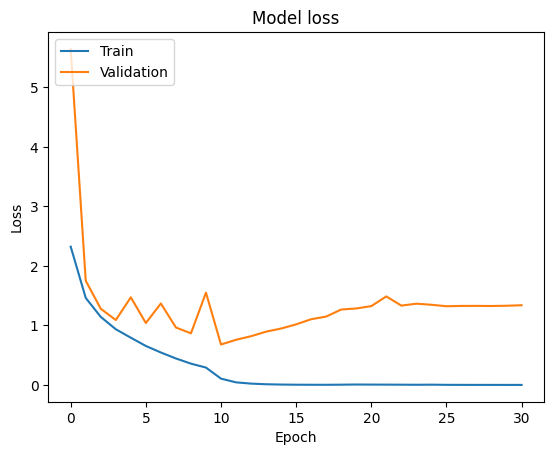

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_resnet34_model1.history['accuracy'])
plt.plot(history_resnet34_model1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_resnet34_model1.history['loss'])
plt.plot(history_resnet34_model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# resnet34_model1 with data augmentation
###############################################################################
###############################################################################
############################# resnet34_model2 ###############################
###############################################################################
###############################################################################

In [ ]:
input_shape = (32, 32, 3)
num_classes = 10


def conv1x1(inputs, filters, stride=1):
  conv = tf.keras.layers.Conv2D(filters=filters, kernel_size=(1, 1), strides=stride,
                                padding='same', use_bias=True)(inputs)
  BachNor = tf.keras.layers.BatchNormalization()(conv)
  RelU = tf.keras.layers.ReLU()(BachNor)
  return RelU

def conv3x3(inputs, filters, stride=1):
  conv = tf.keras.layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=stride,
                                padding='same')(inputs)
  BachNor = tf.keras.layers.BatchNormalization()(conv)
  RelU = tf.keras.layers.ReLU()(BachNor)
  return RelU


def residual_block(inputs, filters, stride=1):
  shortcut = inputs
  if stride != 1 or inputs.shape[-1] != filters:
    shortcut = conv1x1(inputs, filters, stride)
  x = conv3x3(inputs, filters, stride)
  x = conv3x3(x, filters, 1)
 
  output = tf.keras.layers.add([x, shortcut])
  output = tf.keras.layers.ReLU()(output)
  return output

def ResNet34(input_shape, num_classes):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=2,
                               padding='same', use_bias=True)(inputs)
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(4, 4),
                                  padding='same')(inputs)

    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    for filters, stride in [(64, 1), (64, 1), (64, 1), (128, 2), (128, 1), (128, 1), (128, 1), (256, 2), (256, 1), (256, 1), (256, 1), (256, 1), (256, 1), (512, 2), (512, 1), (512, 1)]:
      x = residual_block(x, filters, stride=stride)
    
    
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    resnet34_model2 = models.Model(inputs=inputs, outputs=outputs)
    return resnet34_model2


with strategy.scope():
  resnet34_model2 = ResNet34(input_shape=input_shape, num_classes=num_classes)
  # Compile the model
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
  resnet34_model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


#  Define data augmentation pipelines
data_gen = ImageDataGenerator(
    rotation_range=5,  # rotate images by up to 5 degrees
    width_shift_range=0.025,  # shift images horizontally by up to 2.5% of the width
    height_shift_range=0.025,  # shift images vertically by up to 2.5% of the height
    zoom_range=0.025,  # zoom in on images by up to 2.5%
    horizontal_flip=True,  # flip images horizontally
    # brightness_range=[0.8, 1.2],  # adjust brightness randomly between 0.8 and 1.2
    # shear_range=0.1,  # shear images by up to 10 degrees
    fill_mode='nearest'  # fill any pixel that might be lost after rotation or shift with the nearest pixel value
)




resnet34_model2_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/resnet34_model2.h5'
resnet34_model2_path = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/resnet34_model2_weights'
checkpoint_path = os.path.join(resnet34_model2_path)
checkpoint_Ped = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                                                  patience=3, min_lr=0.00000000001)

def lr_scheduler(epoch):
    if  epoch < 10:
        return 0.01
    if  10<= epoch < 15:
        return 0.001
    if  15<= epoch < 20:
        return 0.0001
    if  20<= epoch < 25:
        return 0.00001
    if  25<= epoch < 30:
        return 0.000001
    else:
        return 0.0000001

reduce_lr = LearningRateScheduler(lr_scheduler)

callbacks_Ped = [checkpoint_Ped, reduce_lr, EarlyStopping(monitor='val_loss', patience=7, verbose=1)]


resnet34_model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_38 (Conv2D)             (None, 32, 32, 64)   3136        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_36 (BatchN  (None, 32, 32, 64)  256         ['conv2d_38[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_52 (ReLU)                (None, 32, 32, 64)   0           ['batch_normalization_36[0]

In [ ]:
# Fit the model with data augmentation
history_resnet34_model2 = resnet34_model2.fit(data_gen.flow(X_train2, y_train2, batch_size=100),
                                               epochs=50,
                                               validation_data=(X_val2, y_val2),
                                               callbacks=callbacks_Ped)


resnet34_model2.save(resnet34_model2_path_T)

test_loss, test_acc = resnet34_model2.evaluate(X_test, y_test)
print("Test accuracy:", test_acc) # Epoch 26: early stopping == Test accuracy: 0.730400025844574

Epoch 1/50
425/425 [==============================] - 58s 76ms/step - loss: 2.3855 - accuracy: 0.2328 - val_loss: 2.2120 - val_accuracy: 0.2025 - lr: 0.0100
Epoch 2/50
425/425 [==============================] - 31s 72ms/step - loss: 1.5563 - accuracy: 0.4270 - val_loss: 2.3706 - val_accuracy: 0.2440 - lr: 0.0100
Epoch 3/50
425/425 [==============================] - 29s 69ms/step - loss: 1.2248 - accuracy: 0.5593 - val_loss: 1.3832 - val_accuracy: 0.5396 - lr: 0.0100
Epoch 4/50
425/425 [==============================] - 29s 69ms/step - loss: 1.0364 - accuracy: 0.6310 - val_loss: 1.5406 - val_accuracy: 0.5241 - lr: 0.0100
Epoch 5/50
425/425 [==============================] - 30s 70ms/step - loss: 0.9004 - accuracy: 0.6829 - val_loss: 0.9025 - val_accuracy: 0.6819 - lr: 0.0100
Epoch 6/50
425/425 [==============================] - 28s 65ms/step - loss: 0.8152 - accuracy: 0.7101 - val_loss: 1.1253 - val_accuracy: 0.6076 - lr: 0.0100
Epoch 7/50
425/425 [==============================] - 27s 

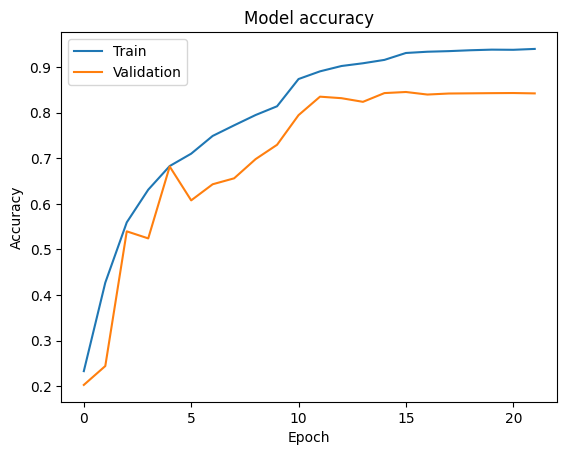

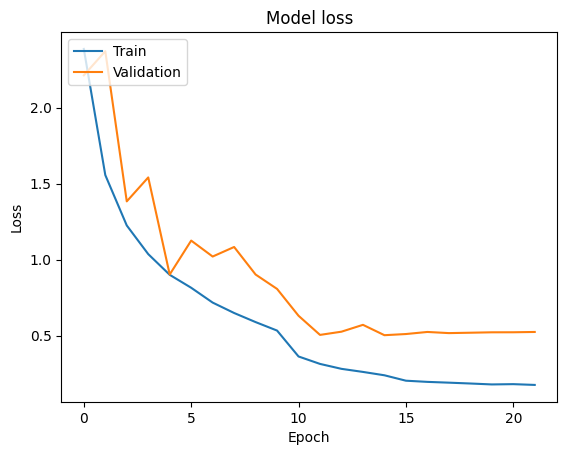

In [ ]:

# Plot training & validation accuracy values
plt.plot(history_resnet34_model2.history['accuracy'])
plt.plot(history_resnet34_model2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_resnet34_model2.history['loss'])
plt.plot(history_resnet34_model2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_size = os.path.getsize(resnet34_model2_path_T) / (1024 * 1024)

# Calculate the top-1 and top-2 accuracies on the test data
top1_accuracy = resnet34_model2.evaluate(X_test, y_test)[1]


# Define a function to calculate the top-2 accuracy
y_pred = resnet34_model2.predict(X_test)

top2_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=2)
top2_acc.update_state(y_test, y_pred)
top2_accuracy = top2_acc.result().numpy()
# print('Top-5 accuracy:', top2_acc.result().numpy())



# Calculate the train and validation accuracies
train_accuracy = resnet34_model2.evaluate(X_train2, y_train2)[1]
val_accuracy = resnet34_model2.evaluate(X_val2, y_val2)[1]

# Count the number of trainable and non-trainable parameters in the model
num_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in resnet34_model2.trainable_variables])
num_non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in resnet34_model2.non_trainable_variables])
num_params = num_trainable_params + num_non_trainable_params

# Calculate the depth of the model
depth = len(resnet34_model2.layers)

# Print the information in the required format
print("| resnet34_model2 | {:.2f} | {:.4f} | {:.4f} | {:.4f} | {:.4f} | {} | {} |".format(
    model_size, top1_accuracy, top2_accuracy, train_accuracy, val_accuracy, num_params, depth))

235/235 [==============================] - 2s 8ms/step - loss: 0.5246 - accuracy: 0.8424
| resnet34_model2 | 244.35 | 0.8330 | 0.9324 | 0.9471 | 0.8424 | 21309002 | 144 |


In [ ]:
# The choice of using grid search versus other optimization techniques depends on 
# the problem at hand and the resources available. Grid search is a simple and 
# straightforward method for hyperparameter tuning and is widely used in practice. However, it may not be the most efficient method for high-dimensional hyperparameter spaces or if the number of samples is large.

# Other optimization techniques such as random search, Bayesian optimization,
# or gradient-based methods may be more efficient in these cases.
# It's important to note that no single method is universally better,
# and the choice of optimization technique should be based on the specific problem and available resources.

# In the case of the soft voting weights for multiple models, grid search may be
#  a reasonable choice if the hyperparameter space is not too large.

In [ ]:
# finding the weights for soft voting
################################################################################
################################################################################
############################### Grid Search ####################################
################################################################################
################################################################################

In [45]:
CNN_model3_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/CNN_model3.h5'
CNN_model3 = tf.keras.models.load_model(CNN_model3_path_T)


resnet50_model3_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/resnet50_model3.h5'
resnet50_model3 = tf.keras.models.load_model(resnet50_model3_path_T)


resnet34_model2_path_T = '/content/drive/MyDrive/Colab Notebooks/DataSet1/Pedram/resnet34_model2.h5'
resnet34_model2 = tf.keras.models.load_model(resnet34_model2_path_T)

In [16]:
# Define the weights for the three models to be optimized
w1_range = np.linspace(0, 1, num=11)
w2_range = np.linspace(0, 1, num=11)
w3_range = np.linspace(0, 1, num=11)

# Define a variable to store the best accuracy found so far
best_acc = 0

# Loop over all possible combinations of weights
for w1 in w1_range:
    for w2 in w2_range:
        for w3 in w3_range:
            print("Current weights: w1={:.2f}, w2={:.2f}, w3={:.2f}".format(w1, w2, w3))
            
            # Compute the weighted average of the predictions for the current weights
            ensemble_preds = w1 * CNN_model3.predict(X_val2) + w2 * resnet50_model3.predict(X_val2) + w3 * resnet34_model2.predict(X_val2)

            # Get the predicted class for each input by taking the index of the maximum probability
            ensemble_classes = np.argmax(ensemble_preds, axis=1)
            
            # Compute the accuracy of the ensemble model on the validation set
            acc = np.mean(np.argmax(y_val2, axis=1) == ensemble_classes)
            
            # Update the best accuracy and weights if a better accuracy is found
            if acc > best_acc:
                best_acc = acc
                print("Current Best Accuracy: {:.2f}%".format(best_acc * 100))
                best_w1, best_w2, best_w3 = w1, w2, w3
            
            del ensemble_preds
            del ensemble_classes

# Print the best accuracy and the corresponding weights
print("Best accuracy: {:.2f}%".format(best_acc * 100))
print("Best weights: w1={:.2f}, w2={:.2f}, w3={:.2f}".format(best_w1, best_w2, best_w3))


Streaming output truncated to the last 5000 lines.
235/235 [==============================] - 1s 5ms/step
Current weights: w1=0.00, w2=0.70, w3=0.60
235/235 [==============================] - 1s 5ms/step
Current weights: w1=0.00, w2=0.70, w3=0.70
235/235 [==============================] - 1s 5ms/step
Current weights: w1=0.00, w2=0.70, w3=0.80
235/235 [==============================] - 1s 5ms/step
Current weights: w1=0.00, w2=0.70, w3=0.90
235/235 [==============================] - 1s 5ms/step
Current weights: w1=0.00, w2=0.70, w3=1.00
235/235 [==============================] - 1s 5ms/step
Current weights: w1=0.00, w2=0.80, w3=0.00
235/235 [==============================] - 1s 5ms/step
Current weights: w1=0.00, w2=0.80, w3=0.10
235/235 [==============================] - 1s 5ms/step
Current weights: w1=0.00, w2=0.80, w3=0.20
235/235 [==============================] - 1s 5ms/step
Current weights: w1=0.00, w2=0.80, w3=0.30
235/235 [==============================] - 1s 5ms/step
Current weig

In [72]:
# Print the best accuracy and the corresponding weights
print("Best accuracy: {:.2f}%".format(best_acc * 100))
print("Best weights: w1={:.2f}, w2={:.2f}, w3={:.2f}".format(best_w1, best_w2, best_w3))

Best accuracy: 92.81%
Best weights: w1=0.30, w2=0.40, w3=0.30


In [69]:
# with optimization 
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
from bayes_opt import BayesianOptimization

# Define the objective function to be optimized
def ensemble_accuracy(w1, w2, w3):
    # Compute the weighted average of the predictions for the current weights
    ensemble_preds = w1 * CNN_model3.predict(X_val2) + w2 * resnet50_model3.predict(X_val2) + w3 * resnet34_model2.predict(X_val2)

    # Get the predicted class for each input
    ensemble_classes = np.argmax(ensemble_preds, axis=1)
    
    # Compute the accuracy of the ensemble model on the validation set
    acc = np.mean(np.argmax(y_val2, axis=1) == ensemble_classes)
    del ensemble_preds
    del ensemble_classes

    return acc

# Define the search space
pbounds = {'w1': (0, 1), 'w2': (0, 1), 'w3': (0, 1)}

# Define the optimizer
optimizer = BayesianOptimization(f=ensemble_accuracy, pbounds=pbounds, random_state=42)

# Initialize the optimizer with an initial guess
optimizer.probe(
    params={'w1': best_w1, 'w2': best_w2, 'w3': best_w3},
    lazy=True
)

# Optimize the weights using Bayesian optimization
optimizer.maximize(init_points=5, n_iter=20)

# Print the best accuracy and the corresponding weights
print("Best accuracy: {:.2f}%".format(optimizer.max['target'] * 100))
print("Best weights: w1={:.2f}, w2={:.2f}, w3={:.2f}".format(optimizer.max['params']['w1'], optimizer.max['params']['w2'], optimizer.max['params']['w3']))


|   iter    |  target   |    w1     |    w2     |    w3     |
-------------------------------------------------------------
235/235 [==============================] - 1s 5ms/step
| 1         | 0.9085    | 0.3       | 0.4       | 0.3       |
235/235 [==============================] - 1s 5ms/step
| 2         | 0.8935    | 0.3745    | 0.9507    | 0.732     |
235/235 [==============================] - 1s 5ms/step
| 3         | 0.9209    | 0.5987    | 0.156     | 0.156     |
235/235 [==============================] - 1s 5ms/step
| 4         | 0.8768    | 0.05808   | 0.8662    | 0.6011    |
235/235 [==============================] - 1s 5ms/step
| 5         | 0.9008    | 0.7081    | 0.02058   | 0.9699    |
235/235 [==============================] - 1s 5ms/step
| 6         | 0.9211    | 0.8324    | 0.2123    | 0.1818    |
235/235 [==============================] - 1s 5ms/step
| 7         | 0.9248    | 1.0       | 0.8131    | 0.0       |
235/235 [==============================] - 1s 5ms/step
| 

In [105]:
# from BayesianOptimization
f_w1=0.64
f_w2=0.59
f_w3=0.00

# # from grid search
# f_w1=best_w1
# f_w2=best_w2
# f_w3=best_w3

# Compute the weighted average of the predictions for the current weights
ensemble_preds = f_w1 * CNN_model3.predict(X_val2) + f_w2 * resnet50_model3.predict(X_val2) + f_w3 * resnet34_model2.predict(X_val2)

# Get the predicted class for each input by taking the index of the maximum probability
ensemble_classes = np.argmax(ensemble_preds, axis=1)
            
# Compute the accuracy of the ensemble model on the validation set
acc = np.mean(np.argmax(y_val2, axis=1) == ensemble_classes)

acc

235/235 [==============================] - 1s 5ms/step


0.9270666666666667

In [106]:
# from BayesianOptimization
f_w1=0.64
f_w2=0.59
f_w3=0.00

# # from grid search
# f_w1=best_w1
# f_w2=best_w2
# f_w3=best_w3

# Compute the weighted average of the predictions for the current weights
ensemble_preds = f_w1 * CNN_model3.predict(X_test) + f_w2 * resnet50_model3.predict(X_test) + f_w3 * resnet34_model2.predict(X_test)

# Get the predicted class for each input by taking the index of the maximum probability
ensemble_classes = np.argmax(ensemble_preds, axis=1)
            
# Compute the accuracy of the ensemble model on the validation set
acc = np.mean(np.argmax(y_test, axis=1) == ensemble_classes)

acc

313/313 [==============================] - 2s 5ms/step


0.8903

In [107]:
# Define input tensor
inputs = keras.Input(shape=(32, 32, 3))

# Get outputs from the three models
output1 = CNN_model3(inputs)
output2 = resnet50_model3(inputs)
output3 = resnet34_model2(inputs)

# Soft voting
output = (output1 * f_w1) + (output2 * f_w2) + (output3 * f_w3)

# Define new model
ensemble_model = Model(inputs=inputs, outputs=output)

# Compile model
optimizer = keras.optimizers.Adam()
ensemble_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

test_loss, test_acc = ensemble_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

val_loss, val_acc = ensemble_model.evaluate(X_val2, y_val2)
print('Val accuracy:', val_acc)


313/313 [==============================] - 7s 13ms/step - loss: 0.4010 - accuracy: 0.8903
Test accuracy: 0.8902999758720398
235/235 [==============================] - 3s 13ms/step - loss: 0.3021 - accuracy: 0.9271
Val accuracy: 0.9270666837692261


In [110]:

# since the weight for this model is zero 0 * os.path.getsize(resnet34_model2_path_T)
model_size = (os.path.getsize(CNN_model3_path_T) +  os.path.getsize(resnet50_model3_path_T)  + 0 * os.path.getsize(resnet34_model2_path_T) )/ (1024 * 1024)

# Calculate the top-1 and top-2 accuracies on the test data
top1_accuracy = ensemble_model.evaluate(X_test, y_test)[1]

# Define a function to calculate the top-2 accuracy
y_pred = ensemble_model.predict(X_test)

top2_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=2)
top2_acc.update_state(y_test, y_pred)
top2_accuracy = top2_acc.result().numpy()
# print('Top-2 accuracy:', top2_acc.result().numpy())



# Calculate the train and validation accuracies
train_accuracy = ensemble_model.evaluate(X_train2, y_train2)[1]
val_accuracy = ensemble_model.evaluate(X_val2, y_val2)[1]

# Count the number of trainable and non-trainable parameters in the model
num_trainable_params1 = np.sum([np.prod(v.get_shape().as_list()) for v in CNN_model3.trainable_variables])
num_non_trainable_params1 = np.sum([np.prod(v.get_shape().as_list()) for v in CNN_model3.non_trainable_variables])

num_trainable_params2 = np.sum([np.prod(v.get_shape().as_list()) for v in resnet50_model3.trainable_variables])
num_non_trainable_params2 = np.sum([np.prod(v.get_shape().as_list()) for v in resnet50_model3.non_trainable_variables])

# since the weight for resnet34_model2 is zero
num_trainable_params3 = 0
num_non_trainable_params3 = 0
# parameter from optimization
opt_par = 3

num_params = num_trainable_params1 + num_non_trainable_params1 + num_trainable_params2 + num_non_trainable_params2 + num_trainable_params3 + num_non_trainable_params3 + opt_par

# Calculate the depth of the model
depth1 = len(CNN_model3.layers)
depth2 = len(resnet50_model3.layers)
depth = max (depth1, depth2)

# Print the information in the required format
print("| ensemble_model | {:.2f} | {:.4f} | {:.4f} | {:.4f} | {:.4f} | {} | {} |".format(
    model_size, top1_accuracy, top2_accuracy, train_accuracy, val_accuracy, num_params, depth))

235/235 [==============================] - 3s 14ms/step - loss: 0.3021 - accuracy: 0.9271
| ensemble_model | 377.27 | 0.8903 | 0.9563 | 0.9999 | 0.9271 | 32906007 | 184 |


In [ ]:
# Finish!! Finally :(